## Differential Evolution Hyperparameter Experiments Pipeline

In [246]:
%pwd
%cd ../..

/


In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import run_differential_evolution

In [248]:
# lists of hyperparameter values to test
strat_vals = [
    'best1bin',
    'best1exp',
    'rand1exp',
    'randtobest1exp',
    'currenttobest1exp',
    'best2exp',
    'rand2exp',
    'randtobest1bin',
    'currenttobest1bin',
    'best2bin',
    'rand2bin',
    'rand1bin',
]
mut_vals = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 1.99]
recomb_vals = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [249]:
# initialize problem to test
problem_name = 'ex4_1_5'
problem = PROBLEMS_BY_NAME[problem_name]
global_minimum = problem['global_minimum']
print('Global minimum: {}'.format(global_minimum))

Global minimum: 0.0


In [250]:
# create new directory to store results if none exists
import os

parent_dir = '/home/seanschweiger/dl_testing/Deeplifting/images/differential_evolution/'
path = os.path.join(parent_dir, problem_name)

if not os.path.exists(path):
    os.mkdir(path)

### Strategy Experiment

In [251]:
strat_results = pd.DataFrame()
for i in range(len(strat_vals)):
    outputs = run_differential_evolution(problem, trials=10, strat=strat_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    strat_results[strat_vals[i]] = fn_results

In [252]:
strat_results

,best1bin,best1exp,rand1exp,randtobest1exp,currenttobest1exp,best2exp,rand2exp,randtobest1bin,currenttobest1bin,best2bin,rand2bin,rand1bin
0,24997.744500,25059.731108,667566.341888,25010.062639,24833.635459,25033.224477,667558.015157,24921.423345,25044.520303,25006.556315,667558.492702,667558.254731
1,24684.211471,25047.121237,667558.755435,24973.838967,24833.635220,24701.414606,667564.039832,24648.174729,24754.453061,24967.840222,667557.749950,667557.954570
2,25056.581745,24944.236889,667558.515346,24935.105008,24982.219658,25003.328059,667574.427734,24935.121081,25052.195055,24514.194196,667557.639127,667557.539629
3,24946.033193,24983.092550,667558.554054,24997.654178,24833.635288,24943.215458,667559.906663,25006.937753,24833.635168,24983.499841,667557.476691,667557.507311
4,25018.868343,25073.083362,667557.505172,24975.207178,24950.469808,24996.006581,667557.464848,24980.949389,24978.785345,25008.590513,667557.514588,667557.544108
5,24926.782271,24928.767025,667557.748398,25065.251312,25060.797742,25058.177486,667559.692256,25276.456781,24833.635246,24989.028994,667558.309220,667557.963899
6,25019.423173,24999.278573,667557.484136,24991.487832,24833.635262,24648.174017,667564.768066,25017.325229,25045.492609,24972.237235,667560.215950,667557.493434
7,24951.011752,25070.514233,667557.515743,24933.024388,25062.468684,25016.470868,667557.433044,25095.227001,25053.844664,24980.391910,667557.850950,667558.588550
8,25022.337544,574698.968196,667557.749900,24960.565355,24978.468724,24966.210384,667559.309767,24875.894610,25042.862488,25036.937638,667569.467050,667557.523830
9,24989.760482,25064.987517,667557.918997,24975.432902,24833.635184,24833.635203,667557.425755,25016.127661,25022.081671,24934.862289,667557.762047,667557.723714


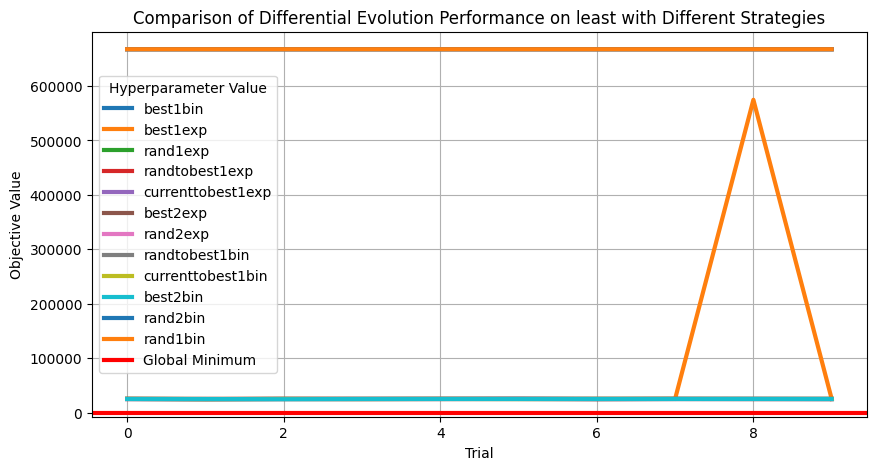

In [253]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
strat_results[strat_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Differential Evolution Performance on {problem_name} with Different Strategies'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/differential_evolution/{problem_name}/strat.png'
)

### Mutation Experiment

In [254]:
mut_results = pd.DataFrame()
for i in range(len(mut_vals)):
    outputs = run_differential_evolution(problem, trials=10, mut=mut_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    mut_results[mut_vals[i]] = fn_results

In [255]:
mut_results

,0.00,0.20,0.40,0.60,0.80,1.00,1.20,1.40,1.60,1.80,1.99
0,24914.146754,25024.899886,25020.795686,24986.350086,24987.425821,24977.051287,25049.364334,25021.825417,752888.000000,24998.742396,736628.888153
1,25024.423912,24686.223018,24685.463076,24687.100003,25049.776436,25020.915934,24903.104913,752888.000000,752888.000000,25021.228346,573633.524913
2,24959.855616,24969.099138,25021.009732,25062.067423,24988.921783,24982.761348,752888.000000,752888.000000,752888.000000,752888.000000,752888.000000
3,25030.569260,25022.560345,24967.593410,25055.972810,25052.809049,24979.259065,752888.000000,752888.000000,752888.000000,706999.894462,752888.000000
4,24949.401422,25073.346060,25061.706044,25060.585433,24989.811229,24949.401422,25073.609956,575154.251144,752888.000000,61853.492707,752888.000000
5,25024.377334,25003.459117,24984.985703,24971.057475,25026.606509,24962.432775,25065.408869,25054.937590,573584.917303,626638.166437,752888.000000
6,25031.833048,24976.302377,24900.447204,24997.385200,24991.643605,25096.418111,24946.051531,25000.567341,24959.674328,752888.000000,24920.980829
7,25141.507065,24952.682067,25035.125835,24980.954580,24940.314116,736736.182177,752888.000000,24981.631416,752888.000000,25008.803422,25076.472580
8,25047.030039,25017.764654,25118.056187,24986.974864,752888.000000,24998.705948,24984.862019,25000.884628,25039.947903,25022.421827,25005.671786
9,24973.450516,25080.631413,25046.760451,25075.609913,24959.496537,24959.669037,575237.097866,24970.013590,24957.128849,728842.979435,24960.677051


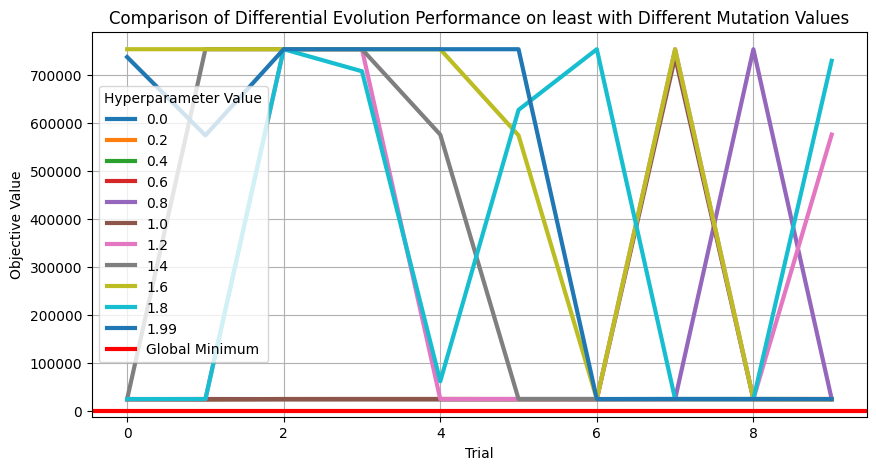

In [256]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
mut_results[mut_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Differential Evolution Performance on {problem_name} with Different Mutation Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/differential_evolution/{problem_name}/mut.png'
)

### Recombination Experiment

In [257]:
recomb_results = pd.DataFrame()
for i in range(len(recomb_vals)):
    outputs = run_differential_evolution(problem, trials=10, recomb=recomb_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    recomb_results[recomb_vals[i]] = fn_results

In [258]:
recomb_results

,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99
0,24995.353626,24964.968075,24833.635178,25001.078739,24989.996698,24934.280016,24966.665919,24997.744500,24949.778760,25032.795788,25015.103191
1,25046.910446,667556.937381,25052.202181,24975.050168,24988.926751,25026.653752,24690.782282,24684.211471,24686.223214,24686.223090,25024.423912
2,24982.572892,24692.554612,25041.889274,24930.173614,24996.875718,24992.207812,25014.620062,25056.581745,25028.472997,25014.824905,25074.008299
3,24514.194084,24727.958620,24651.983482,25074.589349,24994.374737,24961.625390,24989.119769,24946.033193,24950.339327,25000.375290,25021.489312
4,24983.308537,24957.693334,24992.068473,25090.963464,25042.228821,25024.486559,25309.277631,25018.868343,25014.930443,25094.439221,24987.431484
5,24514.194080,667558.013405,24988.864297,24998.138434,24979.528107,24942.273606,25055.226091,24926.782271,24981.623320,24972.489251,25024.377334
6,24989.077366,667557.602919,752888.000000,25032.204167,24952.087433,25015.649753,25005.240441,25019.423173,24982.295101,24962.199398,24998.956677
7,25031.268973,24833.635259,24634.832519,24991.900895,25019.714401,24964.121881,24989.419422,24951.011752,24964.741822,24895.786347,24925.655785
8,25106.281078,24952.506462,25022.629780,752888.000000,24940.015602,25001.583881,24987.196635,25022.337544,25098.871219,25047.030039,25008.456387
9,25075.847253,24621.478613,25001.068228,25000.183305,25007.641224,24991.783362,24966.945134,24989.760482,24971.372789,25009.652287,24975.158310


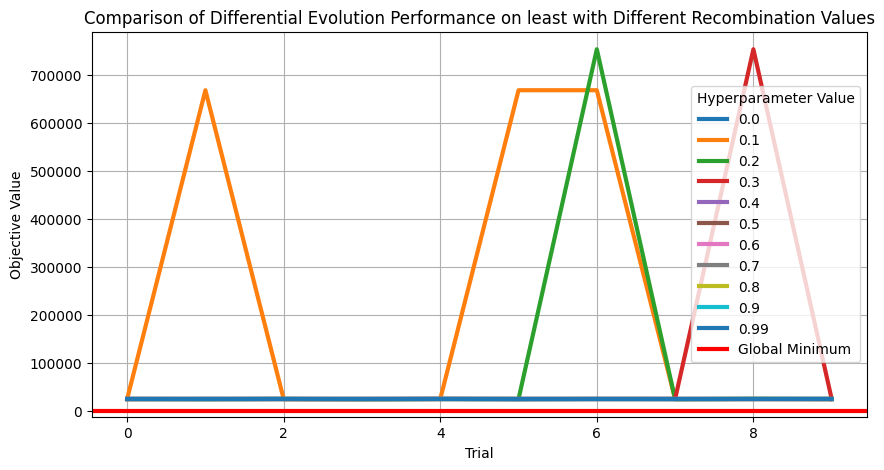

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
recomb_results[recomb_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Differential Evolution Performance on {problem_name} with Different Recombination Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/differential_evolution/{problem_name}/recomb.png'
)